In [95]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<h3 style='color:green'>(1) Preprocessing/testing: Detect face and eyes</h3>

In [96]:
img = cv2.imread('./test_images/Z (5).jpg')
img.shape

(204, 204, 3)

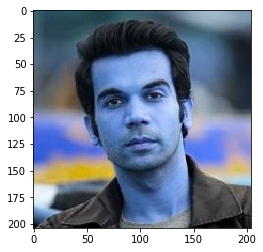

In [97]:
plt.imshow(img)

In [98]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(204, 204)

In [99]:
gray

array([[101, 100,  99, ..., 153, 152, 150],
       [100,  99,  98, ..., 154, 153, 152],
       [ 99,  98,  97, ..., 156, 155, 154],
       ...,
       [ 20,   9,  10, ...,  31,  30,  29],
       [  6,  13,  10, ...,  29,  30,  30],
       [ 12,  15,  17, ...,  29,  31,  32]], dtype=uint8)

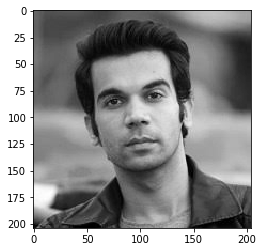

In [100]:
plt.imshow(gray, cmap='gray')

In [101]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 42,  40, 107, 107]], dtype=int32)

In [102]:
(x,y,w,h) = faces[0]
x,y,w,h

(42, 40, 107, 107)

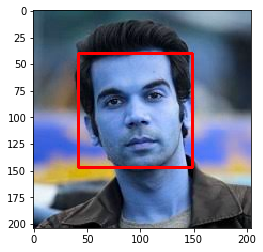

In [103]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

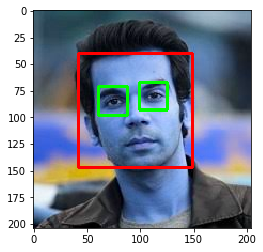

In [104]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:green'>(2) Preprocessing: Crop the facial region of the image</h3>

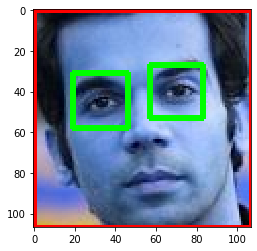

In [105]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [106]:
cropped_img = np.array(roi_color)
cropped_img.shape

(107, 107, 3)

<h3 style='color:green'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

In [107]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

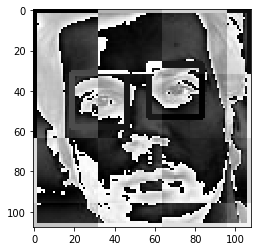

In [108]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [109]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

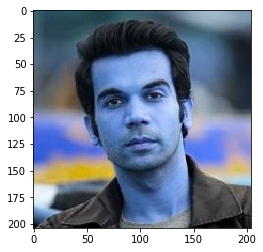

In [110]:
original_image = cv2.imread('./test_images/Z (5).jpg')
plt.imshow(original_image)

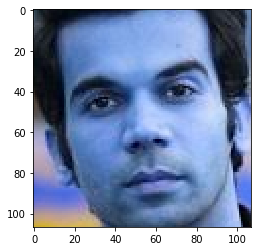

In [111]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Z (5).jpg')
plt.imshow(cropped_image)

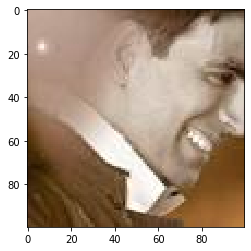

In [112]:
org_image_obstructed = cv2.imread('./test_images/images (10).jpg')
plt.imshow(org_image_obstructed)

In [113]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/images (10).jpg')
(cropped_image_no_2_eyes)

In [132]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [172]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [173]:
img_dirs

['./dataset/alia bhatt',
 './dataset/ayushmann khurrana',
 './dataset/daenerys targaryen',
 './dataset/virat_kohli']

In [174]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [175]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/alia bhatt
Generating cropped images in folder:  ./dataset/cropped/ayushmann khurrana
Generating cropped images in folder:  ./dataset/cropped/daenerys targaryen
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [176]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'alia bhatt': ['./dataset/cropped/alia bhatt\\alia bhatt1.png',
  './dataset/cropped/alia bhatt\\alia bhatt10.png',
  './dataset/cropped/alia bhatt\\alia bhatt11.png',
  './dataset/cropped/alia bhatt\\alia bhatt12.png',
  './dataset/cropped/alia bhatt\\alia bhatt13.png',
  './dataset/cropped/alia bhatt\\alia bhatt14.png',
  './dataset/cropped/alia bhatt\\alia bhatt15.png',
  './dataset/cropped/alia bhatt\\alia bhatt16.png',
  './dataset/cropped/alia bhatt\\alia bhatt17.png',
  './dataset/cropped/alia bhatt\\alia bhatt18.png',
  './dataset/cropped/alia bhatt\\alia bhatt2.png',
  './dataset/cropped/alia bhatt\\alia bhatt3.png',
  './dataset/cropped/alia bhatt\\alia bhatt4.png',
  './dataset/cropped/alia bhatt\\alia bhatt5.png',
  './dataset/cropped/alia bhatt\\alia bhatt6.png',
  './dataset/cropped/alia bhatt\\alia bhatt7.png',
  './dataset/cropped/alia bhatt\\alia bhatt8.png',
  './dataset/cropped/alia bhatt\\alia bhatt9.png'],
 'ayushmann khurrana': ['./dataset/cropped/ayushmann khurr

In [177]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'alia bhatt': 0,
 'ayushmann khurrana': 1,
 'daenerys targaryen': 2,
 'virat_kohli': 3}

In [178]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [179]:
len(X[0])

4096

In [180]:
X[0]

array([[ 56],
       [ 71],
       [ 97],
       ...,
       [251],
       [  5],
       [  0]], dtype=uint8)

In [181]:
y[0]

0

In [182]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(68, 4096)

In [183]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7058823529411765

In [185]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.67      0.67      0.67         6
           2       1.00      0.50      0.67         4
           3       1.00      0.83      0.91         6

    accuracy                           0.71        17
   macro avg       0.73      0.75      0.66        17
weighted avg       0.84      0.71      0.74        17



In [186]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [187]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [188]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.705455,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.665455,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.663636,{'logisticregression__C': 1}


In [189]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

In [190]:
best_estimators['svm'].score(X_test,y_test)

0.9411764705882353

In [191]:
best_estimators['random_forest'].score(X_test,y_test)

0.7647058823529411

In [192]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8235294117647058

In [193]:
best_clf = best_estimators['svm']

In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 4, 0],
       [0, 1, 0, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

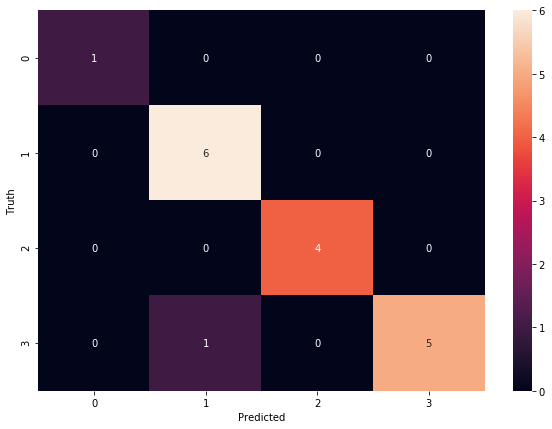

In [195]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [196]:
class_dict

{'alia bhatt': 0,
 'ayushmann khurrana': 1,
 'daenerys targaryen': 2,
 'virat_kohli': 3}

In [197]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [198]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))